/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 - 3s - 7ms/step - accuracy: 0.9024 - loss: 0.3455 - val_accuracy: 0.9542 - val_loss: 0.1580
Epoch 2/20
422/422 - 2s - 4ms/step - accuracy: 0.9596 - loss: 0.1382 - val_accuracy: 0.9697 - val_loss: 0.1133
Epoch 3/20
422/422 - 2s - 4ms/step - accuracy: 0.9715 - loss: 0.0967 - val_accuracy: 0.9740 - val_loss: 0.0925
Epoch 4/20
422/422 - 3s - 7ms/step - accuracy: 0.9777 - loss: 0.0730 - val_accuracy: 0.9760 - val_loss: 0.0816
Epoch 5/20
422/422 - 2s - 4ms/step - accuracy: 0.9821 - loss: 0.0585 - val_accuracy: 0.9760 - val_loss: 0.0831
Epoch 6/20
422/422 - 2s - 4ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9768 - val_loss: 0.0797
Epoch 7/20
422/422 - 2s - 4ms/step - accuracy: 0.9887 - loss: 0.0383 - val_accuracy: 0.9790 - val_loss: 0.0732
Epoch 8/20
422/422 - 2s - 4ms/step - accuracy: 0.9909 - loss: 0.0307 - val_accuracy: 0.9780 - val_loss: 0.0852
Epoch 9/20
422/422 - 2s - 4ms/step - accuracy: 0.9927 - loss: 0.0253 - val_accuracy: 0.9813 - val_loss: 0.0717
E

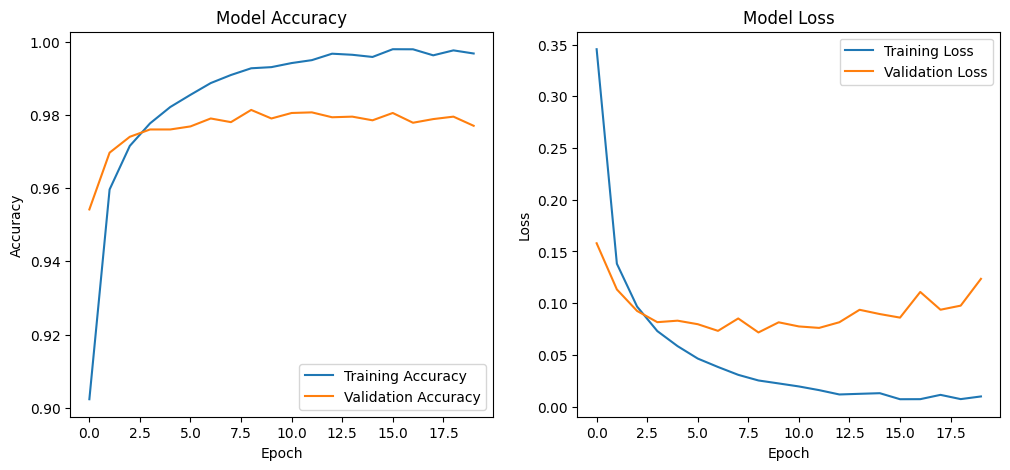

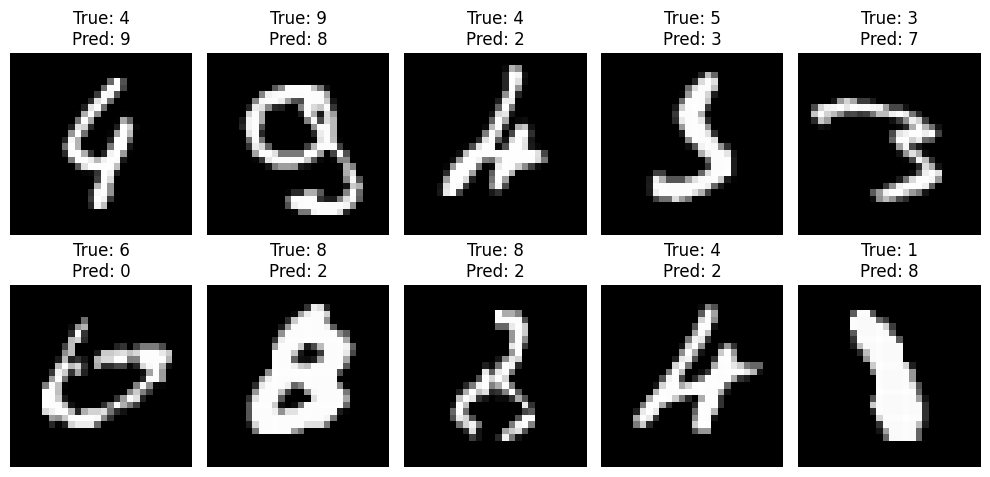

In [3]:
# Program Developed by
# NAME : HARI PRIYA M
# REG NO : 212224240047

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoded format
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 3: Split data into training and validation sets
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.1, random_state=42
)

# Step 4: Define the MLP model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 6: Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val_cat),
    verbose=2
)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 8: Generate classification report and confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Step 9: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 10: Visualize some misclassified images
misclassified_idx = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

